In [1]:
from image_similarity_measures.quality_metrics import *
import tensorflow as tf
import keras
import os
from keras.utils import img_to_array, load_img
from skimage.color import rgb2lab, lab2rgb, gray2rgb
from skimage.transform import resize
from skimage.io import imsave
import numpy as np
import matplotlib.pyplot as plt

2023-03-07 20:42:07.752126: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [19]:
import cv2
from tqdm import tqdm 
import re
# to get the files in proper order
def sorted_alphanumeric(data):  
    convert = lambda text: int(text) if text.isdigit() else text.lower()
    alphanum_key = lambda key: [convert(c) for c in re.split('([0-9]+)',key)]
    return sorted(data,key = alphanum_key)


# defining the size of image 
SIZE = 224

image_path = 'CUHK Dataset/CUHK_training_cropped_photos'
img_array = []

sketch_path = 'CUHK Dataset/CUHK_training_cropped_sketches'
sketch_array = []

image_file = sorted_alphanumeric(os.listdir(image_path))
sketch_file = sorted_alphanumeric(os.listdir(sketch_path))

image_test_path = 'CUHK Dataset/CUHK_testing_cropped_photos'
image_test_file = sorted_alphanumeric(os.listdir(image_test_path))
img_test_array = []

for i in tqdm(image_file):
    image = cv2.imread(image_path + '/' + i,1)
    
    # as opencv load image in bgr format converting it to rgb
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # resizing images 
    image = cv2.resize(image, (SIZE, SIZE))
    
    # normalizing image 
    image = image.astype('float32') / 255.0
    
    #appending normal normal image    
    img_array.append(img_to_array(image))
    # Image Augmentation
    
    # horizontal flip 
    img1 = cv2.flip(image,1)
    img_array.append(img_to_array(img1))
     #vertical flip 
    img2 = cv2.flip(image,-1)
    img_array.append(img_to_array(img2))
     #vertical flip 
    img3 = cv2.flip(image,-1)
    # horizontal flip
    img3 = cv2.flip(img3,1)
    img_array.append(img_to_array(img3))
    # rotate clockwise 
    img4 = cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE)
    img_array.append(img_to_array(img4))
    # flip rotated image 
    img5 = cv2.flip(img4,1)
    img_array.append(img_to_array(img5))
     # rotate anti clockwise 
    img6 = cv2.rotate(image, cv2.ROTATE_90_COUNTERCLOCKWISE)
    img_array.append(img_to_array(img6))
    # flip rotated image 
    img7 = cv2.flip(img6,1)
    img_array.append(img_to_array(img7))
  
    
for i in tqdm(sketch_file):
    image = cv2.imread(sketch_path + '/' + i,1)
    
    # as opencv load image in bgr format converting it to rgb
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # resizing images 
    image = cv2.resize(image, (SIZE, SIZE))
    
    # normalizing image 
    image = image.astype('float32') / 255.0
    # appending normal sketch image
    sketch_array.append(img_to_array(image))
    
    #Image Augmentation
    # horizontal flip 
    img1 = cv2.flip(image,1)
    sketch_array.append(img_to_array(img1))
     #vertical flip 
    img2 = cv2.flip(image,-1)
    sketch_array.append(img_to_array(img2))
     #vertical flip 
    img3 = cv2.flip(image,-1)
    # horizontal flip
    img3 = cv2.flip(img3,1)
    sketch_array.append(img_to_array(img3))
    # rotate clockwise 
    img4 = cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE)
    sketch_array.append(img_to_array(img4))
    # flip rotated image 
    img5 = cv2.flip(img4,1)
    sketch_array.append(img_to_array(img5))
     # rotate anti clockwise 
    img6 = cv2.rotate(image, cv2.ROTATE_90_COUNTERCLOCKWISE)
    sketch_array.append(img_to_array(img6))
    # flip rotated image 
    img7 = cv2.flip(img6,1)
    sketch_array.append(img_to_array(img7))
    
print("Total number of sketch images:",len(sketch_array))
print("Total number of images:",len(img_array))

train_sketch = sketch_array
train_image = img_array

for i in tqdm(image_test_file):
    image = cv2.imread(image_test_path + '/' + i,1)
    
    # as opencv load image in bgr format converting it to rgb
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # resizing images 
    image = cv2.resize(image, (SIZE, SIZE))
    
    # normalizing image 
    image = image.astype('float32') / 255.0
    
    #appending normal normal image    
    img_test_array.append(img_to_array(image))
    # Image Augmentation

test_image = img_test_array

sketch_test_path = 'CUHK Dataset/CUHK_testing_cropped_sketches'
sketch_test_file = sorted_alphanumeric(os.listdir(sketch_test_path))
sketch_test_array = []

for i in tqdm(sketch_test_file):
    image = cv2.imread(sketch_test_path + '/' + i,1)
    
    # as opencv load image in bgr format converting it to rgb
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # resizing images 
    image = cv2.resize(image, (SIZE, SIZE))
    
    # normalizing image 
    image = image.astype('float32') / 255.0
    
    #appending normal normal image    
    sketch_test_array.append(img_to_array(image))
    # Image Augmentation

test_sketch = sketch_test_array

100%|██████████| 88/88 [00:00<00:00, 700.57it/s]


Total number of sketch images: 704
Total number of images: 704


100%|██████████| 100/100 [00:00<00:00, 2216.25it/s]


In [3]:
############################################
def show_images(real,sketch, predicted):
    plt.figure(figsize = (12,12))
    plt.subplot(1,3,1)
    plt.title("Image",fontsize = 15, color = 'Lime')
    plt.imshow(real)
    plt.subplot(1,3,2)
    plt.title("sketch",fontsize = 15, color = 'Blue')
    plt.imshow(sketch)
    plt.subplot(1,3,3)
    plt.title("Predicted",fontsize = 15, color = 'gold')
    plt.imshow(predicted)

In [4]:
def getScores(model_name, encoder_name):
    newmodel = tf.keras.models.load_model(encoder_name,
                                    custom_objects=None,
                                    compile=True)
    model = tf.keras.models.load_model(model_name,
                                    custom_objects=None,
                                    compile=True)

    rmse_array = []
    psnr_array = []
    ssim_array = []
    fsim_array = []
    issm_array = []
    sre_array = []
    sam_array = []
    uiq_array = []
    for i in range(len(test_image)):
        test_sketch_sample = test_sketch[i].reshape((1,224,224,3))
        vggpred = newmodel.predict(test_sketch_sample)
        sample_pred = model.predict(vggpred).reshape((224,224,3))
        rmse_array.append(rmse(test_image[i], sample_pred))
        psnr_array.append(psnr(test_image[i],sample_pred))
        ssim_array.append(ssim(test_image[i],sample_pred))
        fsim_array.append(fsim(test_image[i],sample_pred))
        issm_array.append(issm(test_image[i],sample_pred))
        sre_array.append(sre(test_image[i],sample_pred))
        sam_array.append(sam(test_image[i], sample_pred))
        uiq_array.append(uiq(test_image[i], sample_pred))

    
    print(model_name + " scores:")
    print("rmse: " + str(np.mean(rmse_array)))
    print("psnr: " + str(np.mean(psnr_array)))
    print("ssim: " + str(np.mean(ssim_array)))
    print("fsim: " + str(np.mean(fsim_array)))
    print("issm: " + str(np.mean(issm_array)))
    print("sre: " + str(np.mean(sre_array)))
    print("sam: " + str(np.mean(sam_array)))
    print("uiq: " + str(np.mean(uiq_array)))

In [39]:


models = ["VGG16_dropout_s2f_generator10000.model"]
newmodel = tf.keras.models.load_model("VGG16_pretrained.model",
                                    custom_objects=None,
                                    compile=True)


#Predicting using saved models.
for model_name in models:
    model = tf.keras.models.load_model(model_name,
                                    custom_objects=None,
                                    compile=True)

    rmse_array = []
    psnr_array = []
    ssim_array = []
    fsim_array = []
    issm_array = []
    sre_array = []
    sam_array = []
    uiq_array = []
    for i in range(len(test_image)):
        test_sketch_sample = test_sketch[i].reshape((1,224,224,3))
        vggpred = newmodel.predict(test_sketch_sample)
        sample_pred = model.predict(vggpred).reshape((224,224,3))
        rmse_array.append(rmse(test_image[i], sample_pred))
        psnr_array.append(psnr(test_image[i],sample_pred))
        ssim_array.append(ssim(test_image[i],sample_pred))
        fsim_array.append(fsim(test_image[i],sample_pred))
        issm_array.append(issm(test_image[i],sample_pred))
        sre_array.append(sre(test_image[i],sample_pred))
        sam_array.append(sam(test_image[i], sample_pred))
        uiq_array.append(uiq(test_image[i], sample_pred))

    
    print(model_name + " scores:")
    print("rmse: " + str(np.mean(rmse_array)))
    print("psnr: " + str(np.mean(psnr_array)))
    print("ssim: " + str(np.mean(ssim_array)))
    print("fsim: " + str(np.mean(fsim_array)))
    print("issm: " + str(np.mean(issm_array)))
    print("sre: " + str(np.mean(sre_array)))
    print("sam: " + str(np.mean(sam_array)))
    print("uiq: " + str(np.mean(uiq_array)))

    

(256, 256, 3)


ValueError: in user code:

    File "/Users/ben/opt/anaconda3/envs/tf39/lib/python3.9/site-packages/keras/engine/training.py", line 2041, in predict_function  *
        return step_function(self, iterator)
    File "/Users/ben/opt/anaconda3/envs/tf39/lib/python3.9/site-packages/keras/engine/training.py", line 2027, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/ben/opt/anaconda3/envs/tf39/lib/python3.9/site-packages/keras/engine/training.py", line 2015, in run_step  **
        outputs = model.predict_step(data)
    File "/Users/ben/opt/anaconda3/envs/tf39/lib/python3.9/site-packages/keras/engine/training.py", line 1983, in predict_step
        return self(x, training=False)
    File "/Users/ben/opt/anaconda3/envs/tf39/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/Users/ben/opt/anaconda3/envs/tf39/lib/python3.9/site-packages/keras/engine/input_spec.py", line 295, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_1" is incompatible with the layer: expected shape=(None, 224, 224, 3), found shape=(32, 256, 3)


In [44]:


models = ["convAE_CUHK_s2f_2.model"]



#Predicting using saved models.
for model_name in models:
    model = tf.keras.models.load_model(model_name,
                                    custom_objects=None,
                                    compile=True)

    rmse_array = []
    psnr_array = []
    ssim_array = []
    fsim_array = []
    issm_array = []
    sre_array = []
    sam_array = []
    uiq_array = []
    for i in range(len(test_image)):
        test_sketch_sample = test_sketch[i].reshape(1,256,256,3)
        sample_pred = model.predict(test_sketch_sample).reshape(256,256,3)
        rmse_array.append(rmse(test_image[i], sample_pred))
        psnr_array.append(psnr(test_image[i],sample_pred))
        ssim_array.append(ssim(test_image[i],sample_pred))
        fsim_array.append(fsim(test_image[i],sample_pred))
        issm_array.append(issm(test_image[i],sample_pred))
        sre_array.append(sre(test_image[i],sample_pred))
        sam_array.append(sam(test_image[i], sample_pred))
        uiq_array.append(uiq(test_image[i], sample_pred))

    
    print(model_name + " scores:")
    print("rmse: " + str(np.mean(rmse_array)))
    print("psnr: " + str(np.mean(psnr_array)))
    print("ssim: " + str(np.mean(ssim_array)))
    print("fsim: " + str(np.mean(fsim_array)))
    print("issm: " + str(np.mean(issm_array)))
    print("sre: " + str(np.mean(sre_array)))
    print("sam: " + str(np.mean(sam_array)))
    print("uiq: " + str(np.mean(uiq_array)))

    

1/1 [==============================] - 0s 268ms/step


/Users/ben/opt/anaconda3/envs/tf39/lib/python3.9/site-packages/image_similarity_measures/quality_metrics.py:197: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return structural_similarity(org_img, pred_img, data_range=max_p, multichannel=True)
/Users/ben/opt/anaconda3/envs/tf39/lib/python3.9/site-packages/image_similarity_measures/quality_metrics.py:146: RuntimeWarning: divide by zero encountered in log2
  return -np.sum(np.nan_to_num(H * np.log2(H)))
/Users/ben/opt/anaconda3/envs/tf39/lib/python3.9/site-packages/image_similarity_measures/quality_metrics.py:146: RuntimeWarning: invalid value encountered in multiply
  return -np.sum(np.nan_to_num(H * np.log2(H)))
/Users/ben/opt/anaconda3/envs/tf39/lib/python3.9/site-packages/image_similarity_measures/quality_metrics.py:163: RuntimeWarning: invalid value encountered in double_scalars
  return numerator / denominator


1/1 [==============================] - 0s 144ms/step


/Users/ben/opt/anaconda3/envs/tf39/lib/python3.9/site-packages/image_similarity_measures/quality_metrics.py:260: RuntimeWarning: invalid value encountered in true_divide
  val = np.clip(numerator / denominator, -1, 1)


1/1 [==============================] - 0s 143ms/step
convAE_CUHK_s2f_2.model scores:
rmse: 4.840622e-05
psnr: 86.54223433664278
ssim: 0.99997854
fsim: 0.7197986435337694
issm: 0.0
sre: 26.643091048008603
sam: 5.130005
uiq: 0.18778463622825597


vgg19

In [10]:
getScores('VGG19_s2f_10000.model', "vgg19_pretrained.model")

1/1 [==============================] - 0s 83ms/step


/Users/ben/opt/anaconda3/envs/tf39/lib/python3.9/site-packages/image_similarity_measures/quality_metrics.py:197: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return structural_similarity(org_img, pred_img, data_range=max_p, multichannel=True)
/Users/ben/opt/anaconda3/envs/tf39/lib/python3.9/site-packages/image_similarity_measures/quality_metrics.py:146: RuntimeWarning: divide by zero encountered in log2
  return -np.sum(np.nan_to_num(H * np.log2(H)))
/Users/ben/opt/anaconda3/envs/tf39/lib/python3.9/site-packages/image_similarity_measures/quality_metrics.py:146: RuntimeWarning: invalid value encountered in multiply
  return -np.sum(np.nan_to_num(H * np.log2(H)))
/Users/ben/opt/anaconda3/envs/tf39/lib/python3.9/site-packages/image_similarity_measures/quality_metrics.py:163: RuntimeWarning: invalid value encountered in double_scalars
  return numerator / denominator


1/1 [==============================] - 0s 23ms/step


/Users/ben/opt/anaconda3/envs/tf39/lib/python3.9/site-packages/image_similarity_measures/quality_metrics.py:260: RuntimeWarning: invalid value encountered in true_divide
  val = np.clip(numerator / denominator, -1, 1)


1/1 [==============================] - 0s 21ms/step
VGG19_s2f_10000.model scores:
rmse: 4.612886e-05
psnr: 86.88014091184571
ssim: 0.999982
fsim: 0.7507956316806426
issm: 0.0
sre: 26.216745376385205
sam: 5.2459593
uiq: 0.1738708374861419


vgg19 regularized

In [11]:
getScores("VGG19_s2f_reg0001_1000.model", "vgg19_pretrained.model")


1/1 [==============================] - 0s 76ms/step


/Users/ben/opt/anaconda3/envs/tf39/lib/python3.9/site-packages/image_similarity_measures/quality_metrics.py:197: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return structural_similarity(org_img, pred_img, data_range=max_p, multichannel=True)
/Users/ben/opt/anaconda3/envs/tf39/lib/python3.9/site-packages/image_similarity_measures/quality_metrics.py:146: RuntimeWarning: divide by zero encountered in log2
  return -np.sum(np.nan_to_num(H * np.log2(H)))
/Users/ben/opt/anaconda3/envs/tf39/lib/python3.9/site-packages/image_similarity_measures/quality_metrics.py:146: RuntimeWarning: invalid value encountered in multiply
  return -np.sum(np.nan_to_num(H * np.log2(H)))
/Users/ben/opt/anaconda3/envs/tf39/lib/python3.9/site-packages/image_similarity_measures/quality_metrics.py:163: RuntimeWarning: invalid value encountered in double_scalars
  return numerator / denominator


1/1 [==============================] - 0s 21ms/step


/Users/ben/opt/anaconda3/envs/tf39/lib/python3.9/site-packages/image_similarity_measures/quality_metrics.py:260: RuntimeWarning: invalid value encountered in true_divide
  val = np.clip(numerator / denominator, -1, 1)


1/1 [==============================] - 0s 23ms/step
VGG19_s2f_reg0001_1000.model scores:
rmse: 4.562707e-05
psnr: 87.01549302270845
ssim: 0.9999818
fsim: 0.7758339275515648
issm: 0.0
sre: 26.29086124758346
sam: 5.0046372
uiq: 0.1898723487474671


vggFace 

In [12]:
getScores('vggface_s2f_1000.model',"vggFace_encoder.model")

1/1 [==============================] - 0s 85ms/step


/Users/ben/opt/anaconda3/envs/tf39/lib/python3.9/site-packages/image_similarity_measures/quality_metrics.py:197: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return structural_similarity(org_img, pred_img, data_range=max_p, multichannel=True)
/Users/ben/opt/anaconda3/envs/tf39/lib/python3.9/site-packages/image_similarity_measures/quality_metrics.py:146: RuntimeWarning: divide by zero encountered in log2
  return -np.sum(np.nan_to_num(H * np.log2(H)))
/Users/ben/opt/anaconda3/envs/tf39/lib/python3.9/site-packages/image_similarity_measures/quality_metrics.py:146: RuntimeWarning: invalid value encountered in multiply
  return -np.sum(np.nan_to_num(H * np.log2(H)))
/Users/ben/opt/anaconda3/envs/tf39/lib/python3.9/site-packages/image_similarity_measures/quality_metrics.py:163: RuntimeWarning: invalid value encountered in double_scalars
  return numerator / denominator


1/1 [==============================] - 0s 26ms/step


/Users/ben/opt/anaconda3/envs/tf39/lib/python3.9/site-packages/image_similarity_measures/quality_metrics.py:260: RuntimeWarning: invalid value encountered in true_divide
  val = np.clip(numerator / denominator, -1, 1)


1/1 [==============================] - 0s 28ms/step
vggface_s2f_1000.model scores:
rmse: 3.9783452e-05
psnr: 88.23046859434083
ssim: 0.9999869
fsim: 0.7936859266955878
issm: 0.0
sre: 26.905007263387084
sam: 4.76556
uiq: 0.2553881780184819


vggFace with dropout

In [13]:
getScores('vggface_s2f_dropout_1000.model',"vggFace_encoder.model")

1/1 [==============================] - 0s 85ms/step


/Users/ben/opt/anaconda3/envs/tf39/lib/python3.9/site-packages/image_similarity_measures/quality_metrics.py:197: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return structural_similarity(org_img, pred_img, data_range=max_p, multichannel=True)
/Users/ben/opt/anaconda3/envs/tf39/lib/python3.9/site-packages/image_similarity_measures/quality_metrics.py:146: RuntimeWarning: divide by zero encountered in log2
  return -np.sum(np.nan_to_num(H * np.log2(H)))
/Users/ben/opt/anaconda3/envs/tf39/lib/python3.9/site-packages/image_similarity_measures/quality_metrics.py:146: RuntimeWarning: invalid value encountered in multiply
  return -np.sum(np.nan_to_num(H * np.log2(H)))
/Users/ben/opt/anaconda3/envs/tf39/lib/python3.9/site-packages/image_similarity_measures/quality_metrics.py:163: RuntimeWarning: invalid value encountered in double_scalars
  return numerator / denominator


1/1 [==============================] - 0s 29ms/step


/Users/ben/opt/anaconda3/envs/tf39/lib/python3.9/site-packages/image_similarity_measures/quality_metrics.py:260: RuntimeWarning: invalid value encountered in true_divide
  val = np.clip(numerator / denominator, -1, 1)


1/1 [==============================] - 0s 27ms/step
vggface_s2f_dropout_1000.model scores:
rmse: 3.850339e-05
psnr: 88.54480174711183
ssim: 0.9999875
fsim: 0.81159102328404
issm: 0.0
sre: 27.07007112842168
sam: 4.407736
uiq: 0.28449840061637355


### Face2Sketch Results

In [17]:
def getScoresf2s(model_name, encoder_name):
    newmodel = tf.keras.models.load_model(encoder_name,
                                    custom_objects=None,
                                    compile=True)
    model = tf.keras.models.load_model(model_name,
                                    custom_objects=None,
                                    compile=True)

    rmse_array = []
    psnr_array = []
    ssim_array = []
    fsim_array = []
    issm_array = []
    sre_array = []
    sam_array = []
    uiq_array = []
    for i in range(len(test_image)):
        test_image_sample = test_image[i].reshape((1,224,224,3))
        vggpred = newmodel.predict(test_image_sample)
        sample_pred = model.predict(vggpred).reshape((224,224,3))
        rmse_array.append(rmse(test_sketch[i], sample_pred))
        psnr_array.append(psnr(test_sketch[i],sample_pred))
        ssim_array.append(ssim(test_sketch[i],sample_pred))
        fsim_array.append(fsim(test_sketch[i],sample_pred))
        issm_array.append(issm(test_sketch[i],sample_pred))
        sre_array.append(sre(test_sketch[i],sample_pred))
        sam_array.append(sam(test_sketch[i], sample_pred))
        uiq_array.append(uiq(test_sketch[i], sample_pred))

    
    print(model_name + " scores:")
    print("rmse: " + str(np.mean(rmse_array)))
    print("psnr: " + str(np.mean(psnr_array)))
    print("ssim: " + str(np.mean(ssim_array)))
    print("fsim: " + str(np.mean(fsim_array)))
    print("issm: " + str(np.mean(issm_array)))
    print("sre: " + str(np.mean(sre_array)))
    print("sam: " + str(np.mean(sam_array)))
    print("uiq: " + str(np.mean(uiq_array)))

convAE 

In [16]:
models = ["convAE_CUHK_f2s_50.model"]



#Predicting using saved models.
for model_name in models:
    model = tf.keras.models.load_model(model_name,
                                    custom_objects=None,
                                    compile=True)

    rmse_array = []
    psnr_array = []
    ssim_array = []
    fsim_array = []
    issm_array = []
    sre_array = []
    sam_array = []
    uiq_array = []
    for i in range(len(test_image)):
        test_sketch_sample = test_image[i].reshape(1,256,256,3)
        sample_pred = model.predict(test_sketch_sample).reshape(256,256,3)
        rmse_array.append(rmse(test_sketch[i], sample_pred))
        psnr_array.append(psnr(test_sketch[i],sample_pred))
        ssim_array.append(ssim(test_sketch[i],sample_pred))
        fsim_array.append(fsim(test_sketch[i],sample_pred))
        issm_array.append(issm(test_sketch[i],sample_pred))
        sre_array.append(sre(test_sketch[i],sample_pred))
        sam_array.append(sam(test_sketch[i], sample_pred))
        uiq_array.append(uiq(test_sketch[i], sample_pred))

    
    print(model_name + " scores:")
    print("rmse: " + str(np.mean(rmse_array)))
    print("psnr: " + str(np.mean(psnr_array)))
    print("ssim: " + str(np.mean(ssim_array)))
    print("fsim: " + str(np.mean(fsim_array)))
    print("issm: " + str(np.mean(issm_array)))
    print("sre: " + str(np.mean(sre_array)))
    print("sam: " + str(np.mean(sam_array)))
    print("uiq: " + str(np.mean(uiq_array)))

1/1 [==============================] - 0s 162ms/step


/Users/ben/opt/anaconda3/envs/tf39/lib/python3.9/site-packages/image_similarity_measures/quality_metrics.py:197: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return structural_similarity(org_img, pred_img, data_range=max_p, multichannel=True)
/Users/ben/opt/anaconda3/envs/tf39/lib/python3.9/site-packages/image_similarity_measures/quality_metrics.py:146: RuntimeWarning: divide by zero encountered in log2
  return -np.sum(np.nan_to_num(H * np.log2(H)))
/Users/ben/opt/anaconda3/envs/tf39/lib/python3.9/site-packages/image_similarity_measures/quality_metrics.py:146: RuntimeWarning: invalid value encountered in multiply
  return -np.sum(np.nan_to_num(H * np.log2(H)))
/Users/ben/opt/anaconda3/envs/tf39/lib/python3.9/site-packages/image_similarity_measures/quality_metrics.py:163: RuntimeWarning: invalid value encountered in double_scalars
  return numerator / denominator


1/1 [==============================] - 0s 52ms/step


/Users/ben/opt/anaconda3/envs/tf39/lib/python3.9/site-packages/image_similarity_measures/quality_metrics.py:260: RuntimeWarning: invalid value encountered in true_divide
  val = np.clip(numerator / denominator, -1, 1)


1/1 [==============================] - 0s 50ms/step
convAE_CUHK_f2s_50.model scores:
rmse: 4.177833e-05
psnr: 87.986967741756
ssim: 0.99998695
fsim: 0.760299246232555
issm: 0.0
sre: 29.92099927014781
sam: 0.75328064
uiq: 0.2002965183854881


vgg16

In [20]:
getScoresf2s('VGG16_f2s_1000.model', "VGG16_pretrained.model")

1/1 [==============================] - 0s 76ms/step


/Users/ben/opt/anaconda3/envs/tf39/lib/python3.9/site-packages/image_similarity_measures/quality_metrics.py:197: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return structural_similarity(org_img, pred_img, data_range=max_p, multichannel=True)
/Users/ben/opt/anaconda3/envs/tf39/lib/python3.9/site-packages/image_similarity_measures/quality_metrics.py:146: RuntimeWarning: divide by zero encountered in log2
  return -np.sum(np.nan_to_num(H * np.log2(H)))
/Users/ben/opt/anaconda3/envs/tf39/lib/python3.9/site-packages/image_similarity_measures/quality_metrics.py:146: RuntimeWarning: invalid value encountered in multiply
  return -np.sum(np.nan_to_num(H * np.log2(H)))
/Users/ben/opt/anaconda3/envs/tf39/lib/python3.9/site-packages/image_similarity_measures/quality_metrics.py:163: RuntimeWarning: invalid value encountered in double_scalars
  return numerator / denominator


1/1 [==============================] - 0s 23ms/step


/Users/ben/opt/anaconda3/envs/tf39/lib/python3.9/site-packages/image_similarity_measures/quality_metrics.py:260: RuntimeWarning: invalid value encountered in true_divide
  val = np.clip(numerator / denominator, -1, 1)


1/1 [==============================] - 0s 21ms/step
VGG16_f2s_1000.model scores:
rmse: 4.9095663e-05
psnr: 86.39738879135088
ssim: 0.999984
fsim: 0.724159375602212
issm: 0.0
sre: 28.545968656516223
sam: 0.6228812
uiq: 0.15410710488109206


vgg19

In [23]:
getScoresf2s('VGG19_f2s_10000.model',"VGG19_pretrained.model")

1/1 [==============================] - 0s 75ms/step


/Users/ben/opt/anaconda3/envs/tf39/lib/python3.9/site-packages/image_similarity_measures/quality_metrics.py:197: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return structural_similarity(org_img, pred_img, data_range=max_p, multichannel=True)
/Users/ben/opt/anaconda3/envs/tf39/lib/python3.9/site-packages/image_similarity_measures/quality_metrics.py:146: RuntimeWarning: divide by zero encountered in log2
  return -np.sum(np.nan_to_num(H * np.log2(H)))
/Users/ben/opt/anaconda3/envs/tf39/lib/python3.9/site-packages/image_similarity_measures/quality_metrics.py:146: RuntimeWarning: invalid value encountered in multiply
  return -np.sum(np.nan_to_num(H * np.log2(H)))
/Users/ben/opt/anaconda3/envs/tf39/lib/python3.9/site-packages/image_similarity_measures/quality_metrics.py:163: RuntimeWarning: invalid value encountered in double_scalars
  return numerator / denominator


1/1 [==============================] - 0s 22ms/step


/Users/ben/opt/anaconda3/envs/tf39/lib/python3.9/site-packages/image_similarity_measures/quality_metrics.py:260: RuntimeWarning: invalid value encountered in true_divide
  val = np.clip(numerator / denominator, -1, 1)


1/1 [==============================] - 0s 22ms/step
VGG19_f2s_10000.model scores:
rmse: 4.9172697e-05
psnr: 86.38850319912866
ssim: 0.9999833
fsim: 0.7259200866525188
issm: 0.0
sre: 28.54156653412288
sam: 0.62602
uiq: 0.15193770893885572


vggFace

In [24]:
getScoresf2s('vggface_f2s_1000.model', "vggFace_encoder.model")

1/1 [==============================] - 0s 71ms/step


/Users/ben/opt/anaconda3/envs/tf39/lib/python3.9/site-packages/image_similarity_measures/quality_metrics.py:197: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return structural_similarity(org_img, pred_img, data_range=max_p, multichannel=True)
/Users/ben/opt/anaconda3/envs/tf39/lib/python3.9/site-packages/image_similarity_measures/quality_metrics.py:146: RuntimeWarning: divide by zero encountered in log2
  return -np.sum(np.nan_to_num(H * np.log2(H)))
/Users/ben/opt/anaconda3/envs/tf39/lib/python3.9/site-packages/image_similarity_measures/quality_metrics.py:146: RuntimeWarning: invalid value encountered in multiply
  return -np.sum(np.nan_to_num(H * np.log2(H)))
/Users/ben/opt/anaconda3/envs/tf39/lib/python3.9/site-packages/image_similarity_measures/quality_metrics.py:163: RuntimeWarning: invalid value encountered in double_scalars
  return numerator / denominator


1/1 [==============================] - 0s 22ms/step


/Users/ben/opt/anaconda3/envs/tf39/lib/python3.9/site-packages/image_similarity_measures/quality_metrics.py:260: RuntimeWarning: invalid value encountered in true_divide
  val = np.clip(numerator / denominator, -1, 1)


1/1 [==============================] - 0s 20ms/step
vggface_f2s_1000.model scores:
rmse: 4.9101658e-05
psnr: 86.39454365303949
ssim: 0.9999844
fsim: 0.7441361989010937
issm: 0.0
sre: 28.544522525536703
sam: 0.46458113
uiq: 0.16777394728660577


In [ ]:
    print("Test images:")
    for i in range(3):
        test_sketch_sample = test_sketch[i].reshape((1,224,224,3))
        vggpred = newmodel.predict(test_sketch_sample)
        sample_pred = model.predict(vggpred).reshape((224,224,3))
        
        
        show_images(test_image[i],test_sketch[i],sample_pred)


    print("Train images:")
    for i in range(0,16,8):
        test_sketch_sample = train_sketch[i].reshape((1,224,224,3))
        vggpred = newmodel.predict(test_sketch_sample)
        sample_pred = model.predict(vggpred).reshape((224,224,3))
        
        show_images(train_image[i],train_sketch[i],sample_pred)

In [31]:
image_test_path = 'CUHK Dataset/CUHK_testing_cropped_photos'
image_test_file = sorted_alphanumeric(os.listdir(image_test_path))
img_test_array_cnn = []
SIZE =256
for i in tqdm(image_test_file):
    image = cv2.imread(image_test_path + '/' + i,1)
    
    # as opencv load image in bgr format converting it to rgb
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # resizing images 
    image = cv2.resize(image, (SIZE, SIZE))
    
    # normalizing image 
    image = image.astype('float32') / 255.0
    
    #appending normal normal image    
    img_test_array_cnn.append(img_to_array(image))
    # Image Augmentation



sketch_test_path = 'CUHK Dataset/CUHK_testing_cropped_sketches'
sketch_test_file = sorted_alphanumeric(os.listdir(sketch_test_path))
sketch_test_array_cnn = []

for i in tqdm(sketch_test_file):
    image = cv2.imread(sketch_test_path + '/' + i,1)
    
    # as opencv load image in bgr format converting it to rgb
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # resizing images 
    image = cv2.resize(image, (SIZE, SIZE))
    
    # normalizing image 
    image = image.astype('float32') / 255.0
    
    #appending normal normal image    
    sketch_test_array_cnn.append(img_to_array(image))
    # Image Augmentation



100%|██████████| 100/100 [00:00<00:00, 1813.96it/s]


In [32]:
sketch_test_array_cnn[0].shape

(256, 256, 3)

Images side by side for results section

1/1 [==============================] - 0s 88ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


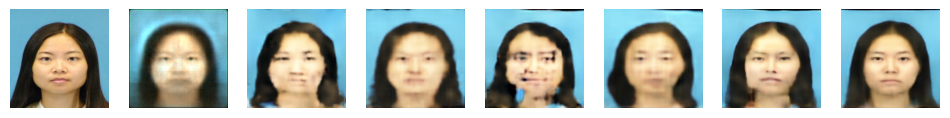

1/1 [==============================] - 0s 85ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


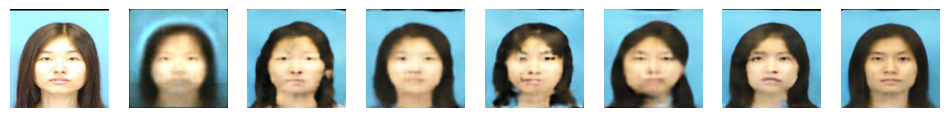

1/1 [==============================] - 0s 87ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


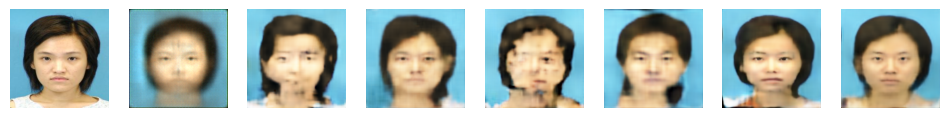

1/1 [==============================] - 0s 93ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


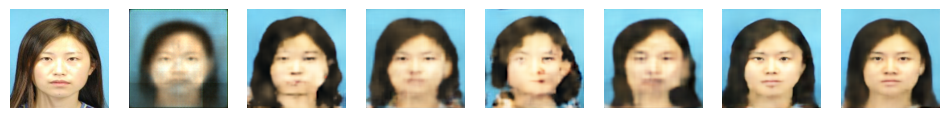

1/1 [==============================] - 0s 92ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


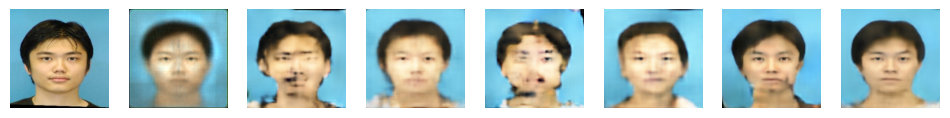

In [63]:
for i in range(0,25,5):

    images = []

    
    images.append(test_image[i])
    
    CNN = tf.keras.models.load_model("convAE_CUHK_s2f_2.model",
                                    custom_objects=None,
                                    compile=True)
    images.append(np.clip(CNN.predict(sketch_test_array_cnn[i].reshape(1,256,256,3)),0.0,1.0).reshape(256,256,3))

    newmodel = tf.keras.models.load_model("VGG16_pretrained.model",
                                    custom_objects=None,
                                    compile=True)
    model = tf.keras.models.load_model('VGG16_s2f_generator_10000.model',
                                    custom_objects=None,
                                    compile=True)
    test_sketch_sample = test_sketch[i].reshape((1,224,224,3))
    vggpred = newmodel.predict(test_sketch_sample)
    images.append(model.predict(vggpred).reshape((224,224,3)))

    newmodel = tf.keras.models.load_model("VGG16_pretrained.model",
                                    custom_objects=None,
                                    compile=True)
    model = tf.keras.models.load_model("VGG16_dropout_s2f_generator10000.model",
                                    custom_objects=None,
                                    compile=True)
    test_sketch_sample = test_sketch[i].reshape((1,224,224,3))
    vggpred = newmodel.predict(test_sketch_sample)
    images.append(model.predict(vggpred).reshape((224,224,3)))

    newmodel = tf.keras.models.load_model("VGG19_pretrained.model",
                                    custom_objects=None,
                                    compile=True)
    model = tf.keras.models.load_model('VGG19_s2f_10000.model',
                                    custom_objects=None,
                                    compile=True)
    test_sketch_sample = test_sketch[i].reshape((1,224,224,3))
    vggpred = newmodel.predict(test_sketch_sample)
    images.append(model.predict(vggpred).reshape((224,224,3)))

    newmodel = tf.keras.models.load_model("VGG19_pretrained.model",
                                    custom_objects=None,
                                    compile=True)
    model = tf.keras.models.load_model("VGG19_s2f_reg0001_1000.model",
                                    custom_objects=None,
                                    compile=True)
    test_sketch_sample = test_sketch[i].reshape((1,224,224,3))
    vggpred = newmodel.predict(test_sketch_sample)
    images.append(model.predict(vggpred).reshape((224,224,3)))

    newmodel = tf.keras.models.load_model("vggFace_encoder.model",
                                    custom_objects=None,
                                    compile=True)
    model = tf.keras.models.load_model('vggface_s2f_1000.model',
                                    custom_objects=None,
                                    compile=True)
    test_sketch_sample = test_sketch[i].reshape((1,224,224,3))
    vggpred = newmodel.predict(test_sketch_sample)
    images.append(model.predict(vggpred).reshape((224,224,3)))

    newmodel = tf.keras.models.load_model("vggFace_encoder.model",
                                    custom_objects=None,
                                    compile=True)
    model = tf.keras.models.load_model('vggface_s2f_dropout_1000.model',
                                    custom_objects=None,
                                    compile=True)
    test_sketch_sample = test_sketch[i].reshape((1,224,224,3))
    vggpred = newmodel.predict(test_sketch_sample)
    images.append(model.predict(vggpred).reshape((224,224,3)))

    plt.figure(figsize = (12,12))
    for col in range(8):
        plt.subplot(1,8,col+1)
        plt.imshow(images[col])
        plt.axis('off')

    plt.show()
    

   

1/1 [==============================] - 0s 68ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


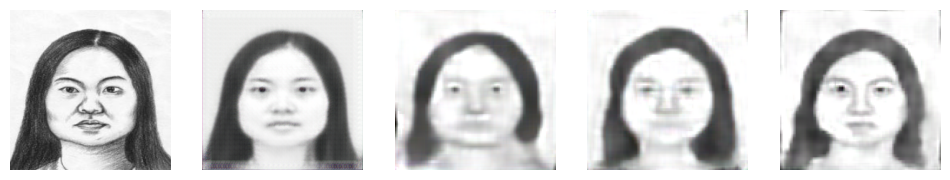

1/1 [==============================] - 0s 67ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


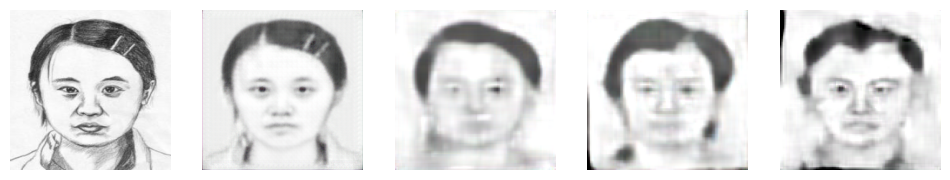

1/1 [==============================] - 0s 65ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


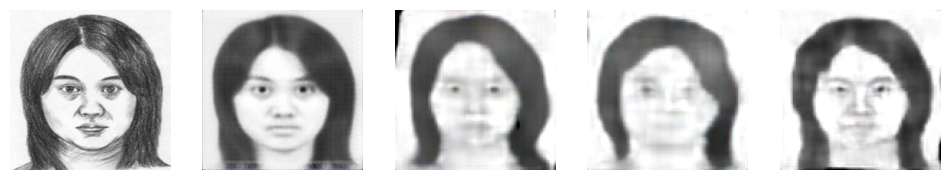

1/1 [==============================] - 0s 71ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


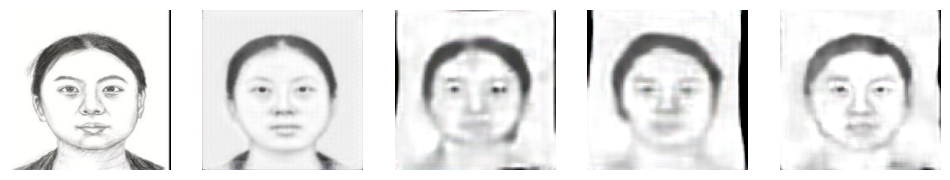

1/1 [==============================] - 0s 66ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


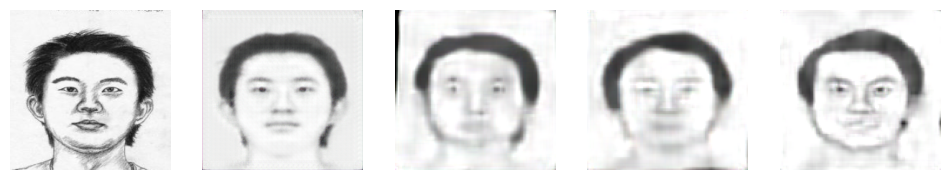

In [65]:
for i in range(0,30,6):

    images = []

    
    images.append(test_sketch[i])
    
    CNN = tf.keras.models.load_model("convAE_CUHK_f2s_50.model",
                                    custom_objects=None,
                                    compile=True)
    images.append(np.clip(CNN.predict(img_test_array_cnn[i].reshape(1,256,256,3)),0.0,1.0).reshape(256,256,3))

    newmodel = tf.keras.models.load_model("VGG16_pretrained.model",
                                    custom_objects=None,
                                    compile=True)
    model = tf.keras.models.load_model('VGG16_f2s_1000.model',
                                    custom_objects=None,
                                    compile=True)
    test_sketch_sample = test_image[i].reshape((1,224,224,3))
    vggpred = newmodel.predict(test_sketch_sample)
    images.append(model.predict(vggpred).reshape((224,224,3)))

    newmodel = tf.keras.models.load_model("VGG19_pretrained.model",
                                    custom_objects=None,
                                    compile=True)
    model = tf.keras.models.load_model("VGG19_f2s_10000.model",
                                    custom_objects=None,
                                    compile=True)
    test_sketch_sample = test_image[i].reshape((1,224,224,3))
    vggpred = newmodel.predict(test_sketch_sample)
    images.append(model.predict(vggpred).reshape((224,224,3)))

    

    newmodel = tf.keras.models.load_model("vggFace_encoder.model",
                                    custom_objects=None,
                                    compile=True)
    model = tf.keras.models.load_model('vggface_f2s_1000.model',
                                    custom_objects=None,
                                    compile=True)
    test_sketch_sample = test_image[i].reshape((1,224,224,3))
    vggpred = newmodel.predict(test_sketch_sample)
    images.append(model.predict(vggpred).reshape((224,224,3)))

    

    plt.figure(figsize = (12,12))
    for col in range(5):
        plt.subplot(1,5,col+1)
        plt.imshow(images[col])
        plt.axis('off')

    plt.show()
    